In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from stock_price_handler import load_stock_prices, get_log_returns
from plots import histogram
from sde import BlackScholes

In [2]:
TIME_INCREMENT = 5
STOCK_NAME = "apple.csv"

In [3]:
stock_prices = load_stock_prices(STOCK_NAME)
actual_log_returns = get_log_returns(stock_prices)

In [4]:
sigma = np.std(actual_log_returns) / np.sqrt(TIME_INCREMENT)
mu = np.mean(actual_log_returns) / TIME_INCREMENT + np.square(sigma) / 2


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/_core/_methods.py:227: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/_core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/_core/_methods.py:219: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar

In [5]:
black_scholes = BlackScholes(mu=mu, sigma=sigma, sample_size=len(stock_prices))

initial_states = torch.tensor(np.array(stock_prices))
times = torch.linspace(0, TIME_INCREMENT, 100)

black_scholes_solution = black_scholes.solution(initial_states, times)
terminal_states = black_scholes_solution[-1]

In [6]:
bs_log_returns = np.log(terminal_states.squeeze().numpy() / initial_states.squeeze().numpy())

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/_histograms_impl.py:902: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/axes/_axes.py:6973: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/axes/_axes.py:6974: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

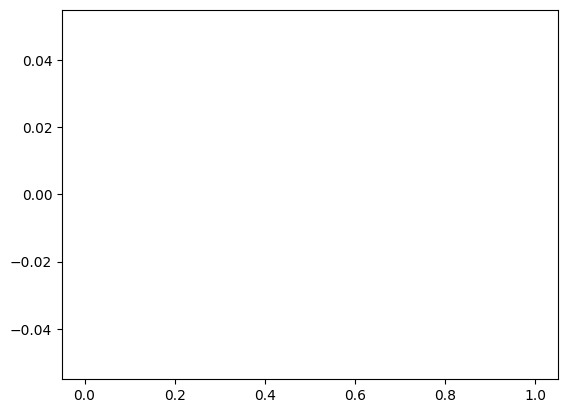

In [7]:
histogram(actual_log_returns, label="Actual", color="black")
histogram(bs_log_returns, label="Black Scholes", color="orange")
plt.title(f"Log Returns after {TIME_INCREMENT} Days: " + STOCK_NAME)
plt.legend()
plt.show()

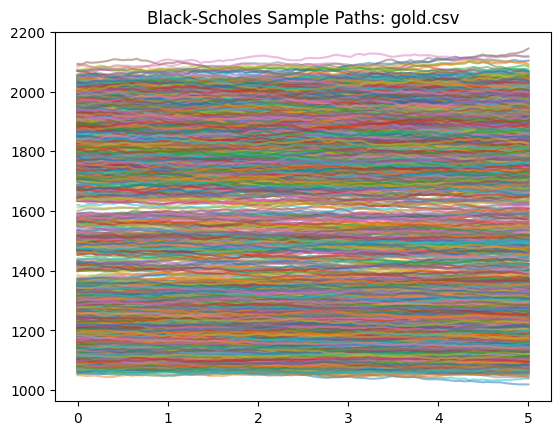

In [ ]:
plt.plot(times, black_scholes_solution.squeeze().numpy(), alpha=.5)
plt.title("Black-Scholes Sample Paths: " + STOCK_NAME)
plt.show()